In [ ]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
raw_df = pd.read_csv(r"/content/preprocessed_fortune500_data.csv")

In [ ]:
df = raw_df.copy()

In [ ]:
df.head()

,Year,Rank,Name,Average CPI,Revenue,Adjusted Revenue
0,2021,1,Walmart,271.0,559151.0,559151.0
1,2021,2,Amazon,271.0,386064.0,386064.0
2,2021,3,Apple,271.0,274515.0,274515.0
3,2021,4,CVS,271.0,268706.0,268706.0
4,2021,5,UnitedHealth Group,271.0,257141.0,257141.0


In [ ]:
# Split the data into training and test sets
train_df = df[df['Year'] <= 2015]
test_df = df[df['Year'] > 2015]

In [ ]:
# Get the last adjusted revenue of each year for the training data
train_last_adjusted_revenue = train_df.groupby('Year')['Adjusted Revenue'].min()

In [ ]:
# Get the last adjusted revenue of each year for the test data
test_last_adjusted_revenue = test_df.groupby('Year')['Adjusted Revenue'].min()


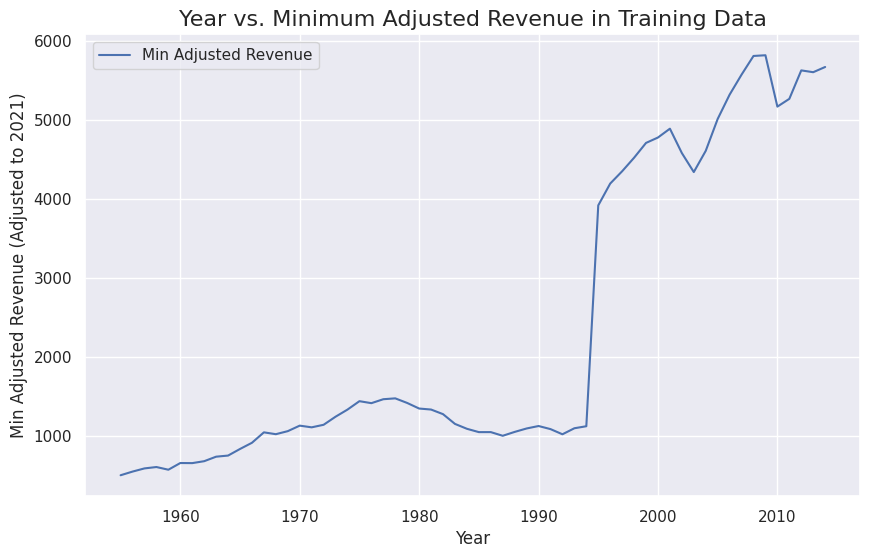

In [ ]:
# Plot the relationship between Year and Adjusted Revenue
plt.figure(figsize=(10, 6))

# Convert the Series to DataFrame and reset the index
plot_df = train_last_adjusted_revenue.to_frame().reset_index()

sns.lineplot(x='Year', y='Adjusted Revenue', data=plot_df, color='b', label='Min Adjusted Revenue')

# Adding titles and labels for clarity
plt.title('Year vs. Minimum Adjusted Revenue in Training Data', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Min Adjusted Revenue (Adjusted to 2021)', fontsize=12)

# Display the graph
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_last_adjusted_revenue.values.reshape(-1, 1))
test_scaled = scaler.transform(test_last_adjusted_revenue.values.reshape(-1, 1))

In [ ]:
# Reshape the data for LSTM
train_X = train_scaled[:-1]
train_y = train_scaled[1:]
test_X = test_scaled[:-1]
test_y = test_scaled[1:]

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=2)
# Make predictions on the test data
test_pred = model.predict(test_X)

Epoch 1/100
2/2 - 3s - 2s/step - loss: 0.2545
Epoch 2/100
2/2 - 0s - 21ms/step - loss: 0.2473
Epoch 3/100
2/2 - 0s - 30ms/step - loss: 0.2397
Epoch 4/100
2/2 - 0s - 29ms/step - loss: 0.2331
Epoch 5/100
2/2 - 0s - 22ms/step - loss: 0.2259
Epoch 6/100
2/2 - 0s - 31ms/step - loss: 0.2188
Epoch 7/100
2/2 - 0s - 25ms/step - loss: 0.2118
Epoch 8/100
2/2 - 0s - 36ms/step - loss: 0.2043
Epoch 9/100
2/2 - 0s - 68ms/step - loss: 0.1966
Epoch 10/100
2/2 - 0s - 80ms/step - loss: 0.1895
Epoch 11/100
2/2 - 0s - 152ms/step - loss: 0.1823
Epoch 12/100
2/2 - 0s - 52ms/step - loss: 0.1738
Epoch 13/100
2/2 - 0s - 52ms/step - loss: 0.1668
Epoch 14/100
2/2 - 0s - 79ms/step - loss: 0.1580
Epoch 15/100
2/2 - 0s - 64ms/step - loss: 0.1505
Epoch 16/100
2/2 - 0s - 52ms/step - loss: 0.1412
Epoch 17/100
2/2 - 0s - 78ms/step - loss: 0.1339
Epoch 18/100
2/2 - 0s - 41ms/step - loss: 0.1253
Epoch 19/100
2/2 - 0s - 29ms/step - loss: 0.1172
Epoch 20/100
2/2 - 0s - 25ms/step - loss: 0.1081
Epoch 21/100
2/2 - 0s - 28ms/s

In [ ]:
# Evaluate the model
mse = model.evaluate(test_X, test_y)
print(f'MSE: {mse:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - loss: 0.0067
MSE: 0.01


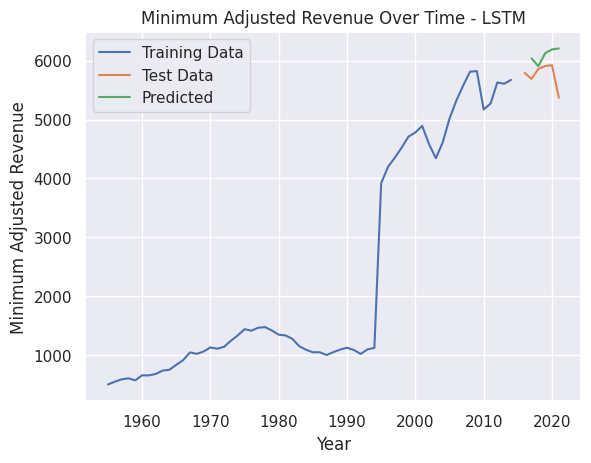

In [ ]:
# Plot the results
plt.plot(train_last_adjusted_revenue.index, train_last_adjusted_revenue.values, label='Training Data')
plt.plot(test_last_adjusted_revenue.index, test_last_adjusted_revenue.values, label='Test Data')
plt.plot(test_last_adjusted_revenue.index[1:], scaler.inverse_transform(test_pred), label='Predicted')
plt.xlabel('Year')
plt.ylabel('Minimum Adjusted Revenue')
plt.title('Minimum Adjusted Revenue Over Time - LSTM')
plt.legend()
plt.show()